In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

## Southern

In [2]:
df = pd.read_csv("southern_burnin_intensity_endpoints.csv")

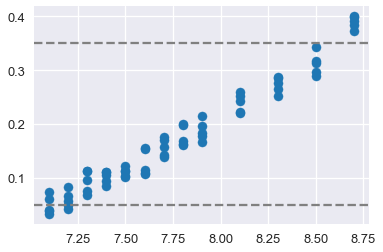

In [3]:
plt.scatter(df["hab"], df["pfpr2_10"])
plt.axhline(0.05, linestyle='dashed', color='gray') #observed range for Zambia
plt.axhline(0.35, linestyle='dashed', color='gray')

In [5]:
def fit_lowess_spline(x, y, frac=0.67, return_error=False, percentile_top=80, percentile_bottom=20):
    # From https://james-brennan.github.io/posts/lowess_conf/
    from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess

    def smooth(x, y, xgrid, frac=0.67):
        samples = np.random.choice(len(x), 50, replace=True)
        y_s = y[samples]
        x_s = x[samples]
        y_sm = sm_lowess(y_s, x_s, frac=frac, it=5,
                         return_sorted=False)
        # regularly sample it onto the grid
        y_grid = scipy.interpolate.interp1d(x_s, y_sm,
                                            fill_value='extrapolate')(xgrid)
        return y_grid

    if not return_error:
        sm_x, sm_y = sm_lowess(y, x, frac=frac, return_sorted=True).T
        return sm_x, sm_y
    elif return_error:
        xgrid = np.linspace(x.min(), x.max())
        K = 100
        smooths = np.stack([smooth(x, y, xgrid, frac=frac) for k in range(K)]).T

        mean = np.nanmean(smooths, axis=1)
        #         median = np.nanmedian(smooths, axis=1)
        q_top = np.nanpercentile(smooths, percentile_top, axis=1)
        q_bot = np.nanpercentile(smooths, percentile_bottom, axis=1)

        return xgrid, mean, q_bot, q_top

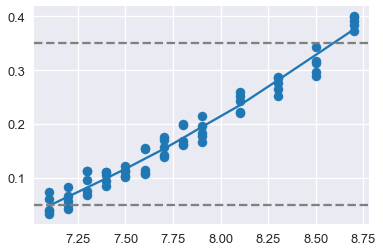

In [6]:
x,y = df["hab"], df["pfpr2_10"]
xs,ys = fit_lowess_spline(x,y)
plt.scatter(df["hab"], df["pfpr2_10"])
plt.plot(xs,ys)
plt.axhline(0.05, linestyle='dashed', color='gray') #observed range for Zambia
plt.axhline(0.35, linestyle='dashed', color='gray')

In [10]:
southern_interp = np.interp([0.05,0.15,0.25,0.35],ys,xs)

In [11]:
print(southern_interp)

array([7.10894572, 7.6808631 , 8.16606932, 8.59169366])

In [22]:
burnin_master_df = pd.DataFrame({
    "archetype": "Southern",
    "approximate_pfpr2_10": [0.05,0.15,0.25,0.35],
    "habitat_scale": [7.1,7.7,8.2,8.6],
    "exp_id": "ae162b7e-1f8f-eb11-a2ce-c4346bcb1550",
    "sim_id": ["7eaf9a84-1f8f-eb11-a2ce-c4346bcb1550",
              "7faf9a84-1f8f-eb11-a2ce-c4346bcb1550",
              "80af9a84-1f8f-eb11-a2ce-c4346bcb1550",
              "82af9a84-1f8f-eb11-a2ce-c4346bcb1550"],
    "path": ["\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\1d8\\3e6\\8a1\\1d83e68a-1f8f-eb11-a2ce-c4346bcb1550",
            "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\1e8\\3e6\\8a1\\1e83e68a-1f8f-eb11-a2ce-c4346bcb1550",
            "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\1f8\\3e6\\8a1\\1f83e68a-1f8f-eb11-a2ce-c4346bcb1550",
            "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\218\\3e6\\8a1\\2183e68a-1f8f-eb11-a2ce-c4346bcb1550"]
})

In [23]:
burnin_master_df.to_csv("../burnins.csv", index=False)